<a href="https://colab.research.google.com/github/Hruthikaveldi/Hruthikaveldi-NLP-ASSIGNMENTS-1543/blob/main/1543(NLP_5_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
zip_path = "tweets.csv.zip"
with zipfile.ZipFile('/content/tweets.csv.zip', 'r') as z:
    file_name = z.namelist()[0]
    df = pd.read_csv(z.open(file_name))

In [27]:
X = df["text"].astype(str)
y = df["target"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=10000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
log_reg = LogisticRegression(max_iter=200, class_weight="balanced")
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=200)

In [31]:
feature_names = vectorizer.get_feature_names_out()
coeffs = log_reg.coef_[0]

In [32]:
top_disaster_idx = coeffs.argsort()[-20:][::-1]
top_disaster_words = [(feature_names[i], coeffs[i]) for i in top_disaster_idx]

In [33]:
top_nondisaster_idx = coeffs.argsort()[:20]
top_nondisaster_words = [(feature_names[i], coeffs[i]) for i in top_nondisaster_idx]

In [34]:
print("\nTop Disaster Words:")
print(top_disaster_words)
print("\nTop Non-Disaster Words:")
print(top_nondisaster_words)


Top Disaster Words:
[('thunderstorm', np.float64(4.05762280643283)), ('collision', np.float64(3.595855374699753)), ('killed', np.float64(3.3265774958513483)), ('train', np.float64(3.023829516671069)), ('died', np.float64(2.901344254850132)), ('windstorm', np.float64(2.7788011398424324)), ('road', np.float64(2.761959784386663)), ('volcano', np.float64(2.7111484283181007)), ('rescued', np.float64(2.660503615515505)), ('sinkhole', np.float64(2.604237665568945)), ('ukrainian', np.float64(2.557256292818728)), ('bus', np.float64(2.537772507911575)), ('australia', np.float64(2.5179786817701264)), ('warning', np.float64(2.5052836921488524)), ('british', np.float64(2.464788087261599)), ('hit', np.float64(2.3940717762327584)), ('severe', np.float64(2.364336559658581)), ('iran', np.float64(2.3242696366437032)), ('reported', np.float64(2.297278509999641)), ('injured', np.float64(2.2850399237729273))]

Top Non-Disaster Words:
[('like', np.float64(-2.949194037714838)), ('don', np.float64(-2.4233792

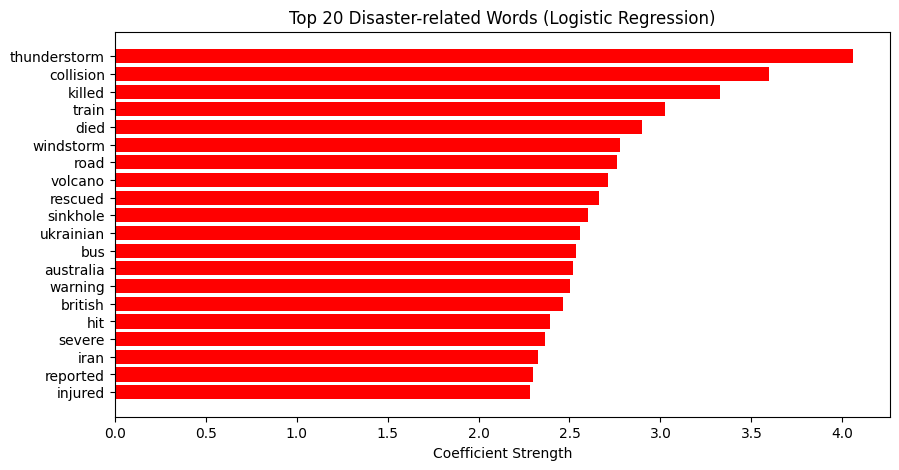

In [35]:
words, scores = zip(*top_disaster_words)
plt.figure(figsize=(10,5))
plt.barh(words[::-1], scores[::-1], color="red")
plt.title("Top 20 Disaster-related Words (Logistic Regression)")
plt.xlabel("Coefficient Strength")
plt.show()

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color="white")\
            .generate_from_frequencies(dict(top_disaster_words))

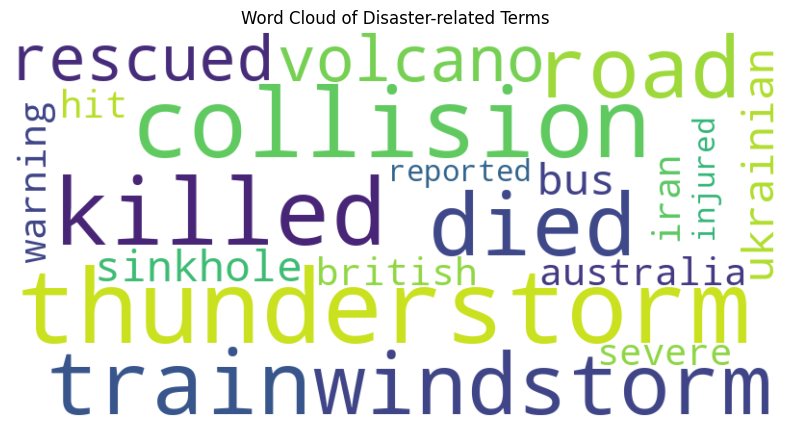

In [37]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Disaster-related Terms")
plt.show()

In [38]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [39]:
rf.fit(X_train_tfidf, y_train)
dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [40]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "Decision Tree": dt
}

In [41]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1-Score": f1_score(y_test, y_pred, average='binary')
    })

In [48]:
results_df = pd.DataFrame(results)

In [49]:
print("\nModel Performance:")
print(results_df)


Model Performance:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.861038   0.599258  0.763593  0.671518
1        Random Forest  0.874670   0.816514  0.420804  0.555382
2        Decision Tree  0.812665   0.497006  0.588652  0.538961
